In [ ]:
# Project 5: Spam Detection Using Native Bayes + TF-IDE

#step1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# step2: load the dataset using github

url = "https://raw.githubusercontent.com/programmer-sahil/Ardent_ML_Training/main/Project%205/spam_dataset.csv"
df = pd.read_csv(url)
print(df.head())

  label                                            message
0   ham         Hey! Are we still meeting for lunch today?
1   ham                               I'll call you later.
2  spam  Congratulations! You've won a $500 gift card. ...
3  spam  URGENT! Your account has been suspended. Click...
4   ham      Don't forget to bring the documents tomorrow.


In [ ]:
# step3: Encode labels

df['label_encoded'] = df['label'].map({'ham':0, 'spam':1})
print(df.head)

# why? ML algorithms need members, not words

<bound method NDFrame.head of    label                                            message  label_encoded
0    ham         Hey! Are we still meeting for lunch today?              0
1    ham                               I'll call you later.              0
2   spam  Congratulations! You've won a $500 gift card. ...              1
3   spam  URGENT! Your account has been suspended. Click...              1
4    ham      Don't forget to bring the documents tomorrow.              0
5    ham             Happy birthday! Wish you all the best.              0
6   spam  Win a FREE vacation to Bahamas! Text WIN to 90...              1
7   spam  You have been selected for a free prize. Call ...              1
8    ham                   Please find the attached report.              0
9    ham         Can you send me the photos from yesterday?              0
10  spam          Limited time offer!!! Buy 1 Get 1 FREE!!!              1
11  spam                   Claim your lottery winnings now!           

In [ ]:
# step4: Train / Test Split

X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    df['label_encoded'],
    test_size=0.2,
    random_state=42
)

'''
train → learning

test → evaluation

20% test gives good balance
'''

'\ntrain → learning\n\ntest → evaluation\n\n20% test gives good balance\n'

In [ ]:
#step 5: TF-IDF Vectorization

tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# TF-IDF converts text to numbers by weighting important words like:
# "FREE", "OFFER", "WIN", "PRIZE"

In [ ]:
# step 6: Train Naive Bayes Model

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

'''
Why Naive Bayes?
Very fast, Works great for text, low memory usuage
'''

'\nWhy Naive Bayes?\nVery fast, Works great for text, low memory usuage\n'

In [ ]:
# step7: Make Predictions

y_pred = model.predict(X_test_tfidf)

In [ ]:
# step 8: Evaluate Model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

'''
Accuracy: overall correctness
Precision: quality of spam predictions
Recall: how many spam messages were caught
Confusion Matrix: breakdown of TP, TN, FP, FN
'''

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      0.83      0.91         6
        spam       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8


 Confusion Matrix:
 [[5 1]
 [0 2]]


'\nAccuracy: overall correctness\nPrecision: quality of spam predictions\nRecall: how many spam messages were caught\nConfusion Matrix: breakdown of TP, TN, FP, FN\n'

**Step 9: Try Custom User Input**

In [ ]:
sample_msgs=[
    "Congratulations! You have won a FREE prize. Call now!",
    "Hey bro, are we still meeting tomorrow?"
]

sample_tfidf = tfidf.transform(sample_msgs)
print(model.predict(sample_tfidf))

[1 0]


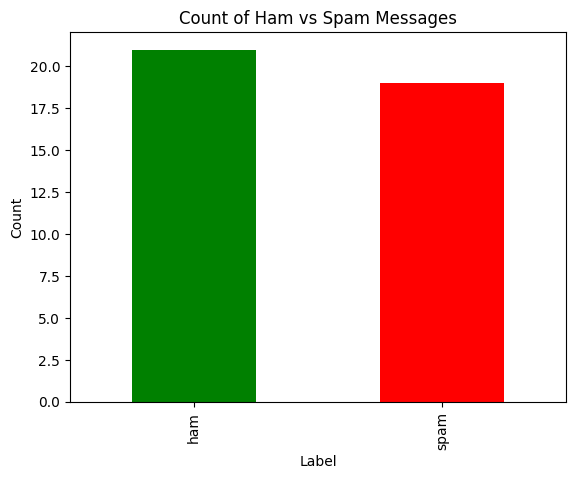

In [ ]:
# Optional Step: Bar Chart of Spam vs Ham Distribution

import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Count of Ham vs Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()